# Data Dive 4
## Real Estate Agency

### James Evans, Brent Yelle, Sabrina Peterson, Nicholas Sartino

In [211]:
# Modules

#!pip install missingno
# Comment out if not needed - used briefly to export png images from bar graphs.
#!pip install plotly-orca
#!pip install -U kaleido

In [376]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('fivethirtyeight')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

import plotly.express as px
import plotly.io as pio

import missingno as msno


In [213]:
# Read data
df = (pd.read_csv('housing.csv', header = 0))

# Basic Data Information

In [214]:
# Basic Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [215]:
# Basic Stats

df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<Axes: >

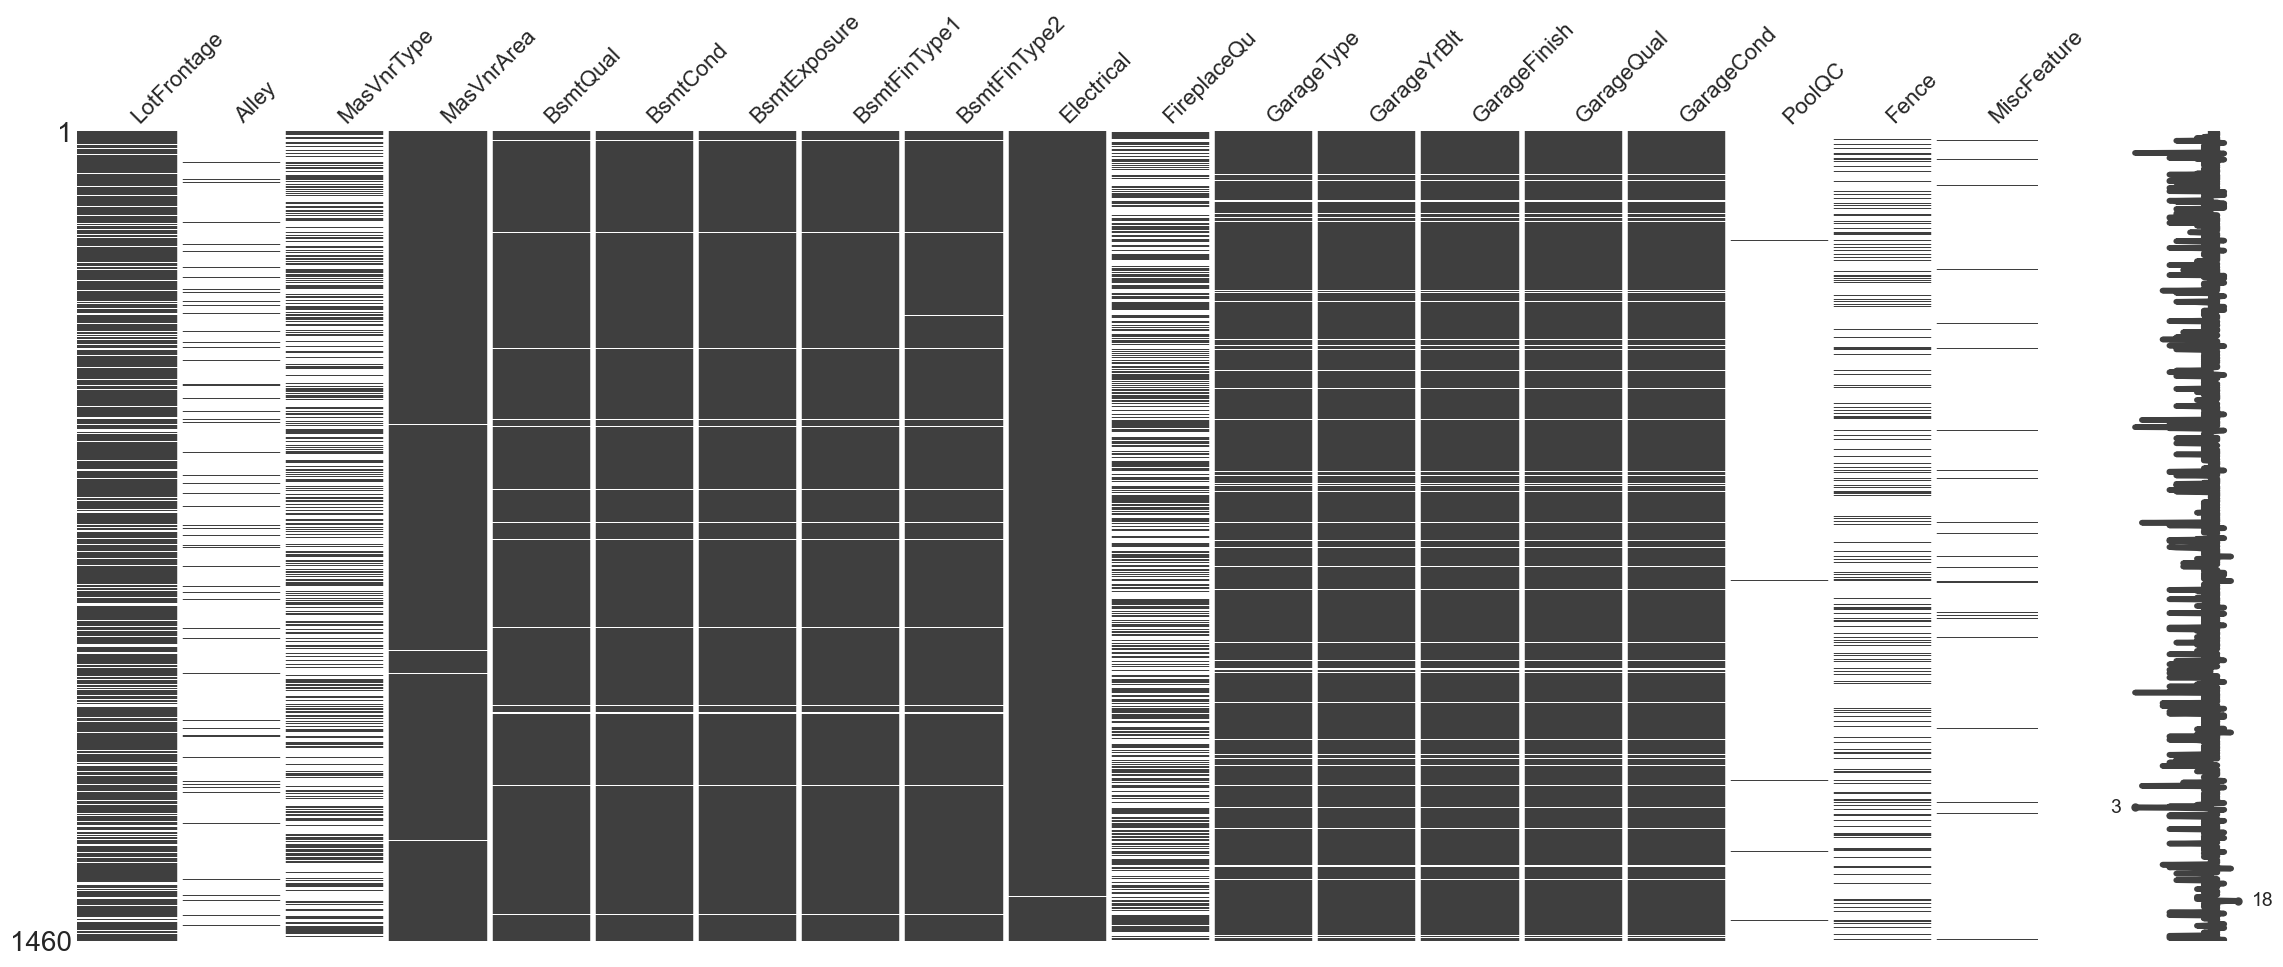

In [263]:
# Visualize missing values

# Create a DataFrame with only null columns
null_columns_df = df[df.columns[df.isnull().any()]].copy()

# Show null matrix with null_columns_df
msno.matrix(null_columns_df)

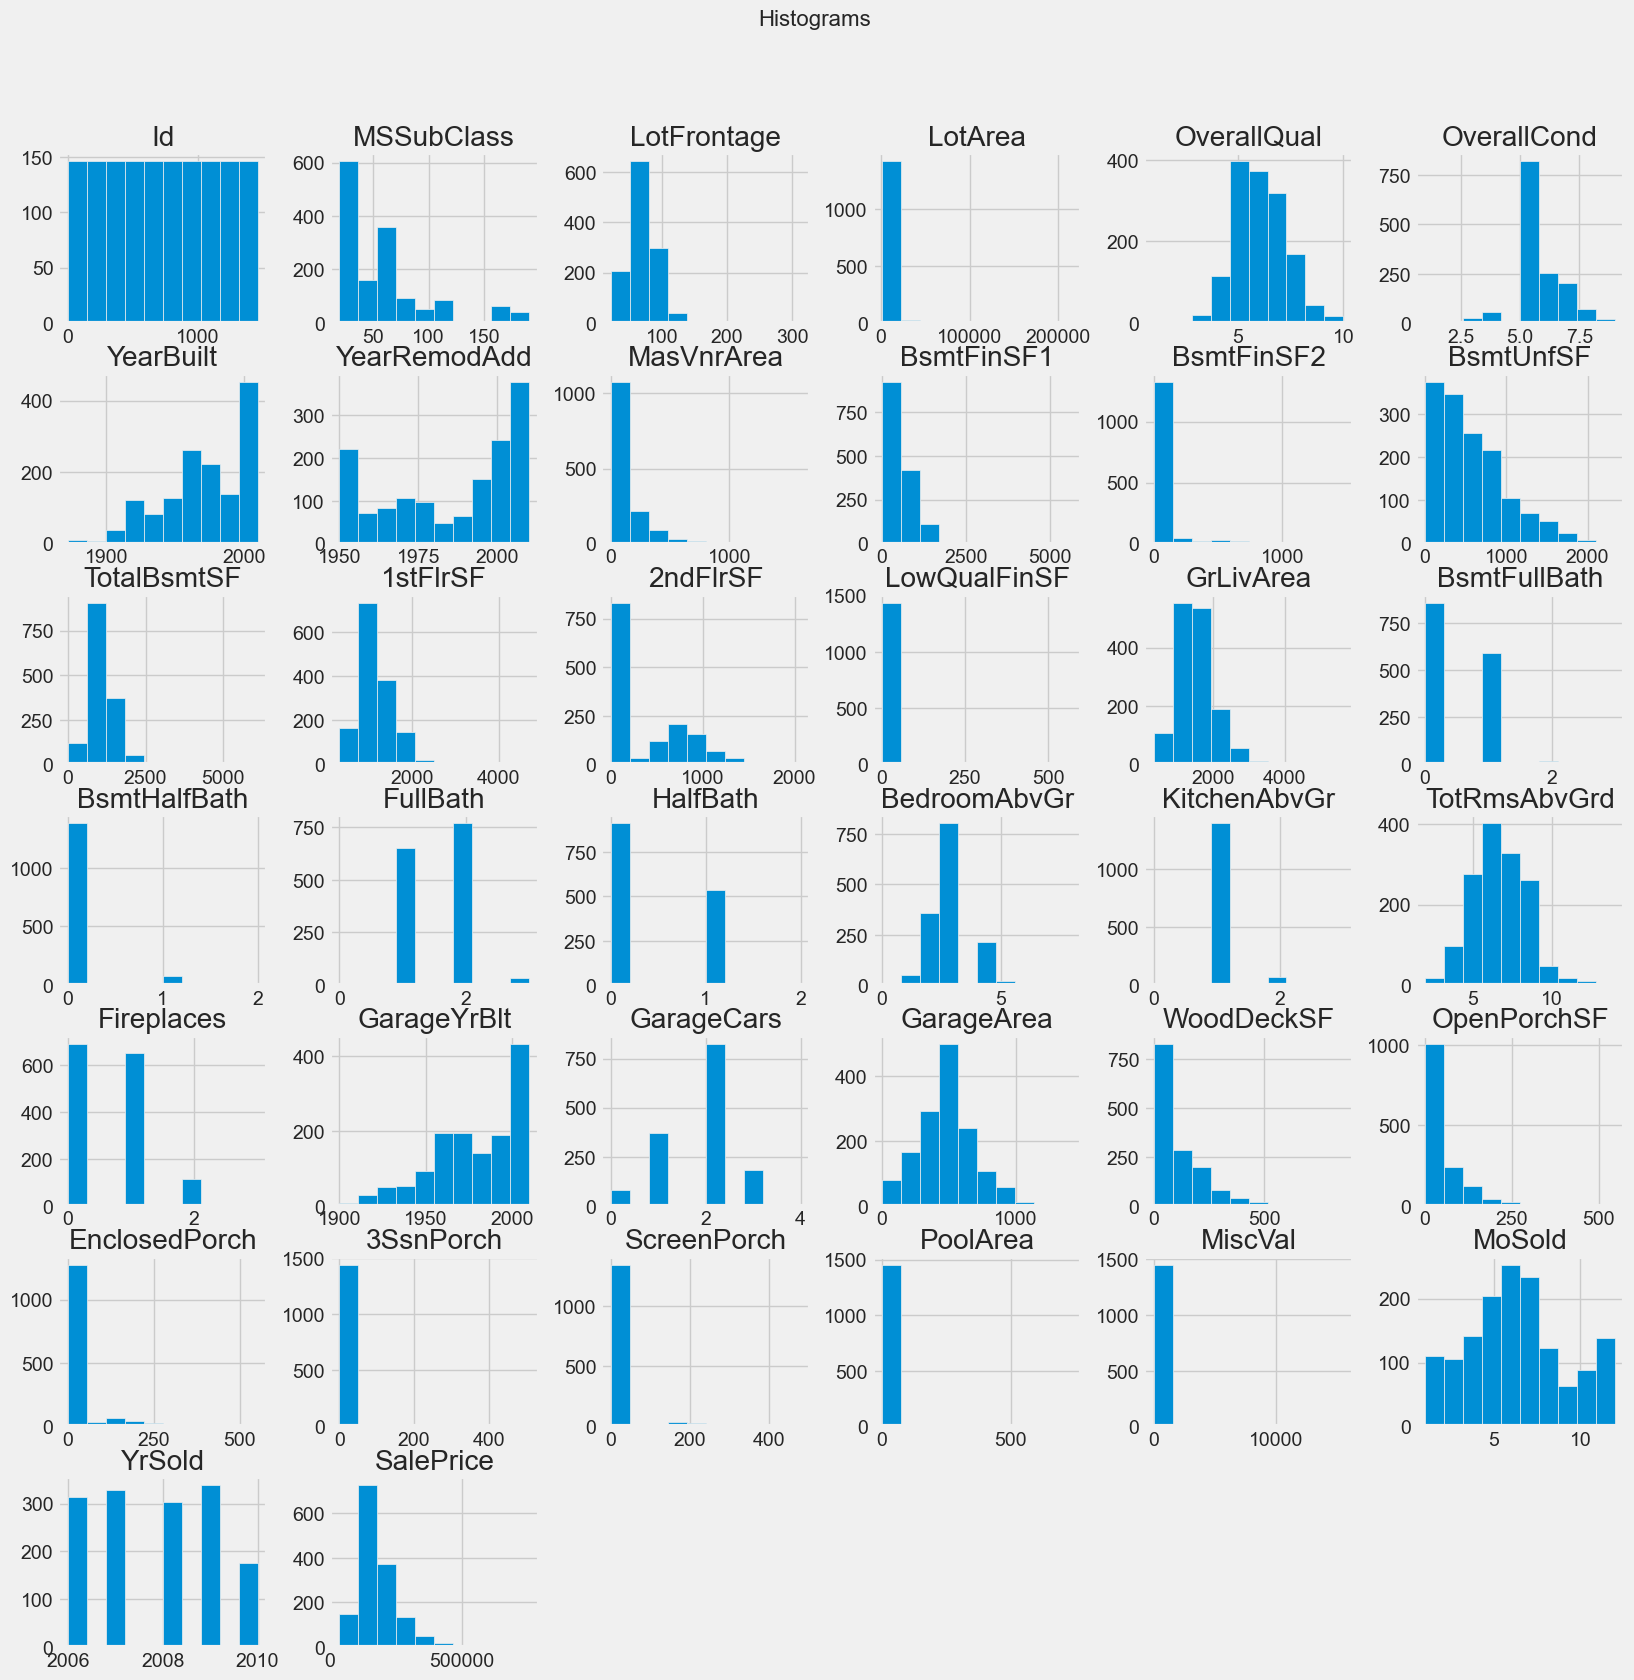

In [217]:
# Histograms
df.hist(figsize=(18, 18))

# Customize titles to make them smaller
plt.suptitle('Histograms', fontsize=16)  # Overall title
plt.subplots_adjust(top=0.9)  # Adjust the top margin to make space for the subtitle

plt.show()

In [218]:
# Choose the column for which you want to print distinct values
column_to_check = 'Neighborhood'

# Use the unique() function directly
distinct_values = df[column_to_check].unique()

# Print distinct values
for value in distinct_values:
    print(value)

CollgCr
Veenker
Crawfor
NoRidge
Mitchel
Somerst
NWAmes
OldTown
BrkSide
Sawyer
NridgHt
NAmes
SawyerW
IDOTRR
MeadowV
Edwards
Timber
Gilbert
StoneBr
ClearCr
NPkVill
Blmngtn
BrDale
SWISU
Blueste


In [219]:
# Join neighborhood_names and append column to dataframe for cleaner names

df_neighborhoods = (pd.read_csv('neighborhood_names', header = 0))

df_neighborhoods.drop(columns=['Unnamed: 2'],inplace=True)

# Perform the left join and select only the 'Neighborhood_info' column from the foreign table
result_df = pd.merge(df, df_neighborhoods[['Neighborhood_id', 'Neighborhood_info']], left_on='Neighborhood', right_on='Neighborhood_id', how='left')

# Drop the redundant 'Neighborhood_id' column
result_df = result_df.drop('Neighborhood_id', axis=1)

result_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Neighborhood_info
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,College Creek
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,Veenker
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,College Creek
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,Crawford
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,Northridge


In [220]:
# Null Counts

result_df.isnull().sum() 

Id                     0
MSSubClass             0
MSZoning               0
LotFrontage          259
LotArea                0
                    ... 
YrSold                 0
SaleType               0
SaleCondition          0
SalePrice              0
Neighborhood_info      0
Length: 82, dtype: int64

In [221]:
# Copy into original dataframe
df = result_df.copy()

# James' Charts

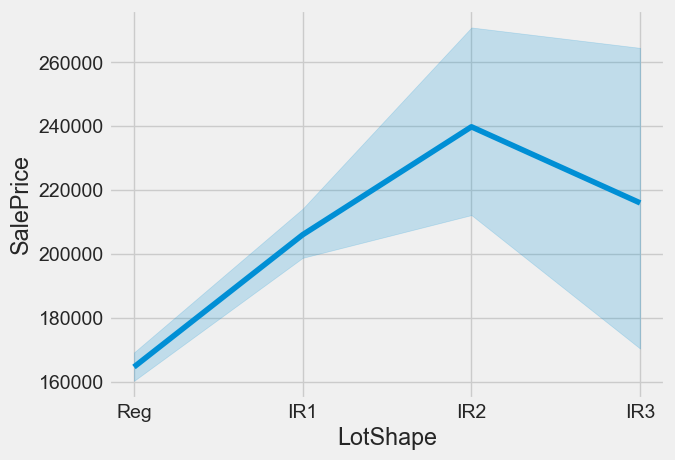

In [222]:
## Looking at the irregularity of lot shape
sns.lineplot(data=df,x='LotShape',y='SalePrice')

ir1_df = df[df['LotShape']=='IR1']

<Axes: xlabel='LotShape', ylabel='SalePrice'>

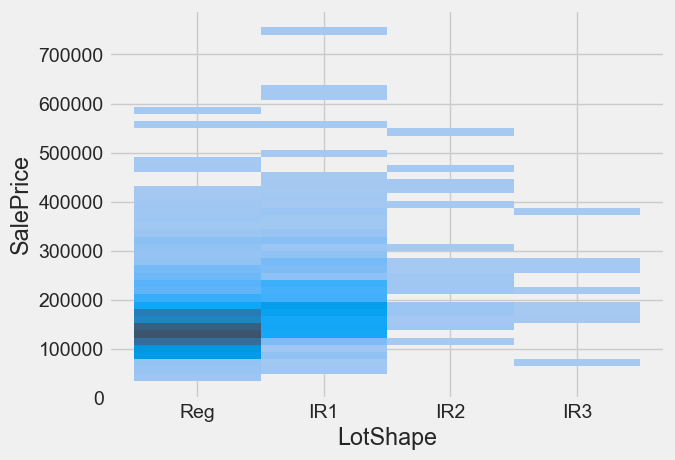

In [223]:
# Another option of looking at shape
sns.histplot(data=df,x='LotShape',y='SalePrice')

In [224]:
df['SalePrice'].groupby(df['LotShape']).agg(['median','mean'])
#house_df['GrLivArea'].groupby(house_df['LotShape']).agg(['median','mean'])

nei_df = result_df['SalePrice'].groupby(result_df['Neighborhood_info']).agg(['median'])
nei_df = nei_df.sort_values(ascending=True,by='median')

<Axes: xlabel='LandSlope', ylabel='SalePrice'>

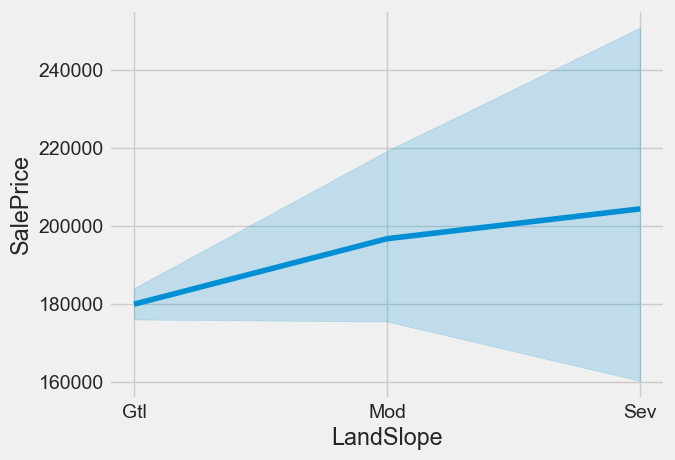

In [225]:
sns.lineplot(data=df,x='LandSlope',y='SalePrice')

<Axes: xlabel='LandSlope', ylabel='SalePrice'>

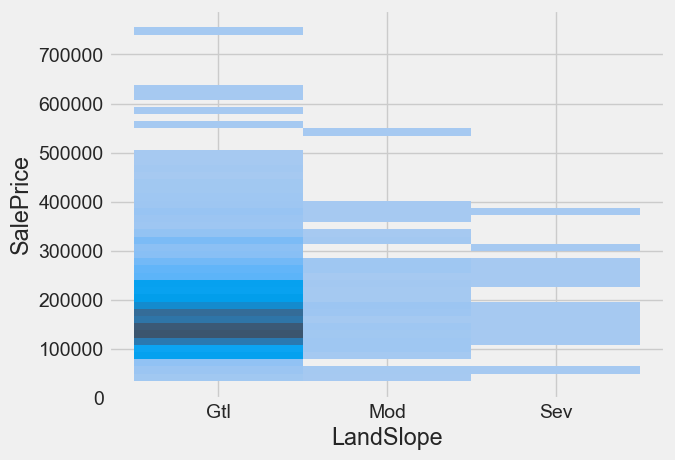

In [226]:
sns.histplot(data=df,x='LandSlope',y='SalePrice')

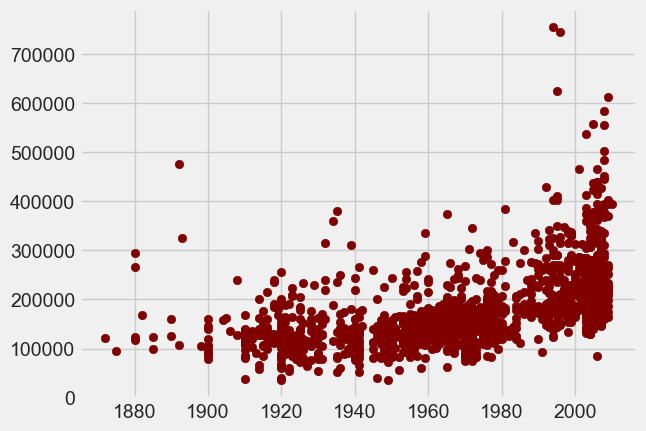

In [227]:
plt.scatter(df["YearBuilt"],df['SalePrice'],color='maroon')

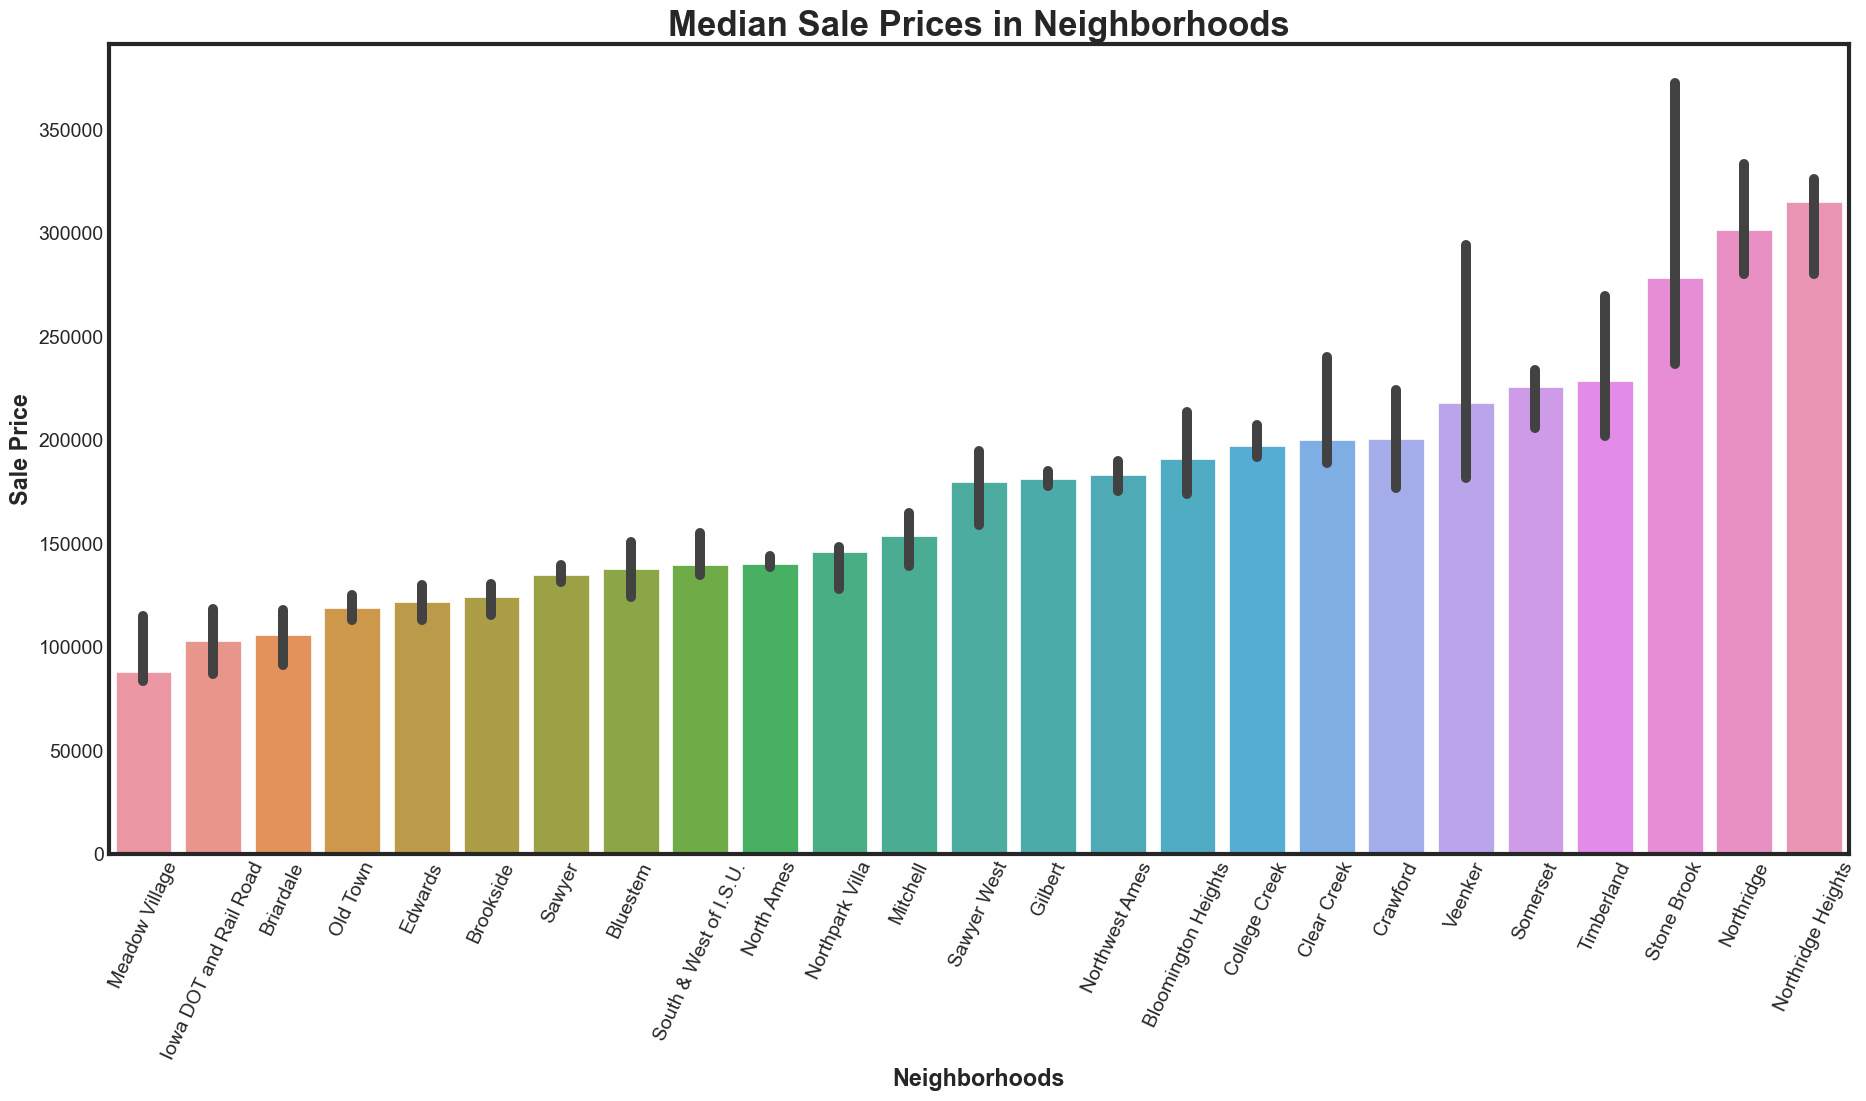

In [228]:
#Sale Prices of property by neighborhood
sns.set_style('white')
fig,sale = plt.subplots(figsize=(20,10))
fig = sns.barplot(data=result_df,x='Neighborhood_info',y='SalePrice',order=nei_df.index,estimator=np.median)
#fig = sns.boxplot(data=house_df,x='Neighborhood',y='SalePrice',order=nei_df.index)
fig=plt.xticks()
plt.xticks(rotation=65)
plt.title('Median Sale Prices in Neighborhoods', weight ='bold').set_fontsize('25')
plt.xlabel('Neighborhoods',weight ='bold')
plt.ylabel('Sale Price',weight ='bold');

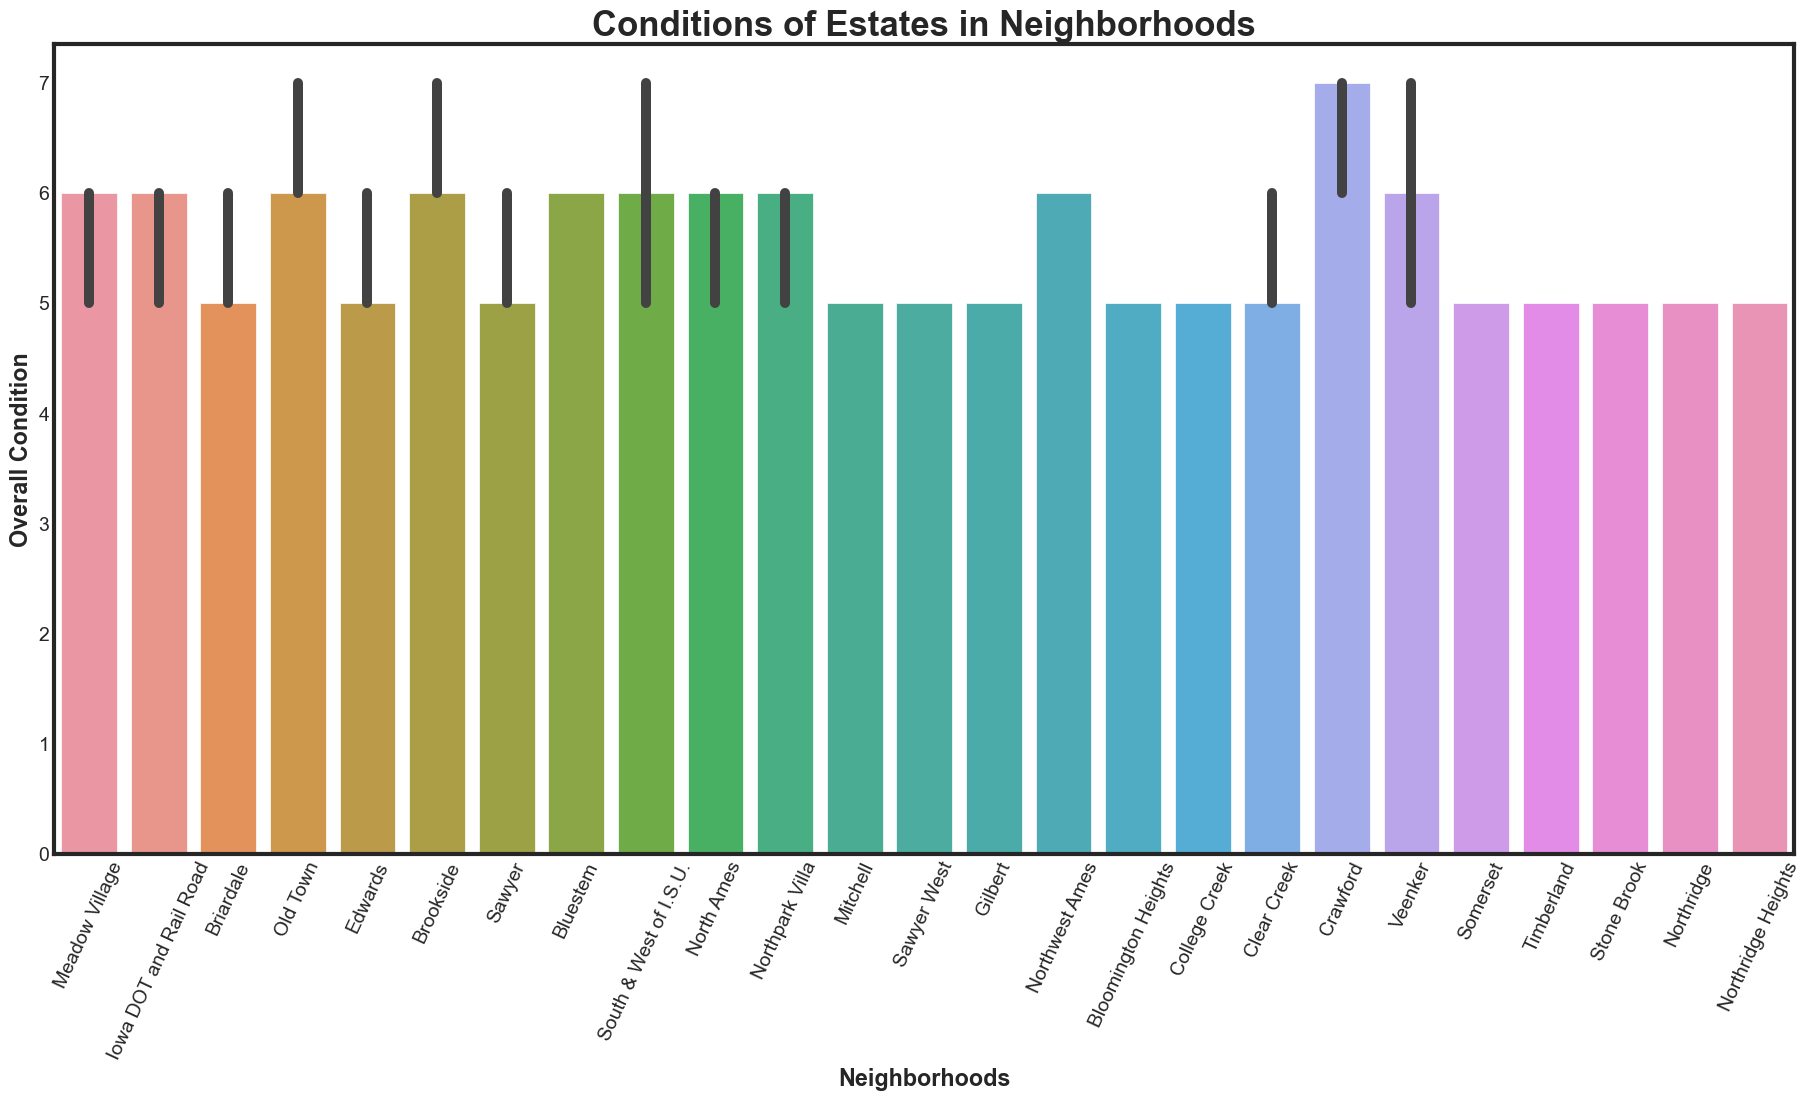

In [229]:
#Overall Conditions for sales by neighborhood
sns.set_style('white')
fig,sale = plt.subplots(figsize=(20,10))
fig = sns.barplot(data=result_df,x='Neighborhood_info',y='OverallCond',order=nei_df.index,estimator=np.median)
fig=plt.xticks()
plt.xticks(rotation=65)
plt.title('Conditions of Estates in Neighborhoods',weight ='bold').set_fontsize('25')
plt.xlabel('Neighborhoods',weight ='bold')
plt.ylabel('Overall Condition',weight ='bold');

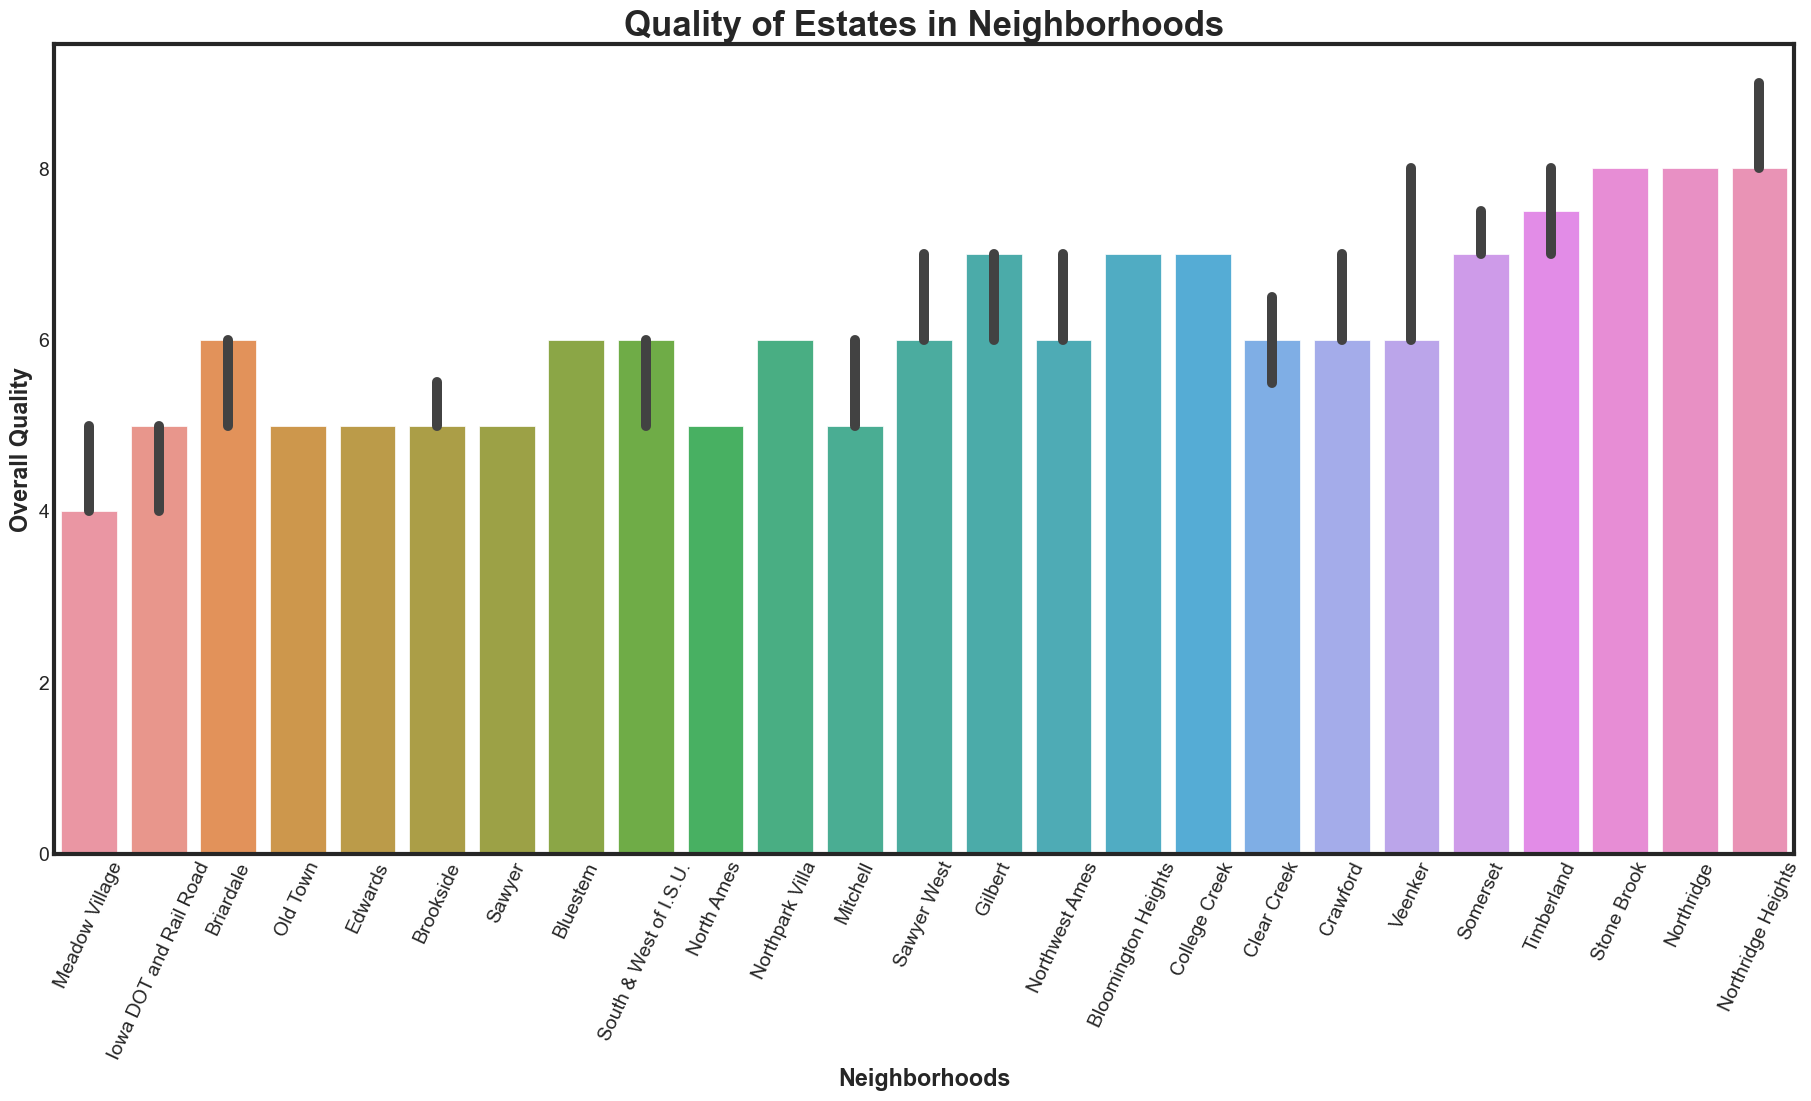

In [230]:
#Overall Quality of property by neighborhood
sns.set_style('white')
fig,sale = plt.subplots(figsize=(20,10))
fig = sns.barplot(data=result_df,x='Neighborhood_info',y='OverallQual',order=nei_df.index,estimator=np.median)
fig=plt.xticks()
plt.xticks(rotation=65)
plt.title('Quality of Estates in Neighborhoods',weight ='bold').set_fontsize('25')
plt.xlabel('Neighborhoods',weight ='bold')
plt.ylabel('Overall Quality',weight ='bold');

In [231]:
#Creating a dataset of neighborhoods with median cheap sales 
cheap_df = result_df[result_df['Neighborhood_info'].isin(nei_df.index[0:8])]
cheap_df.info()
print(nei_df.index[0:10])
cheap_df['LotArea'].median()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 8 to 1459
Data columns (total 82 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 417 non-null    int64  
 1   MSSubClass         417 non-null    int64  
 2   MSZoning           417 non-null    object 
 3   LotFrontage        367 non-null    float64
 4   LotArea            417 non-null    int64  
 5   Street             417 non-null    object 
 6   Alley              61 non-null     object 
 7   LotShape           417 non-null    object 
 8   LandContour        417 non-null    object 
 9   Utilities          417 non-null    object 
 10  LotConfig          417 non-null    object 
 11  LandSlope          417 non-null    object 
 12  Neighborhood       417 non-null    object 
 13  Condition1         417 non-null    object 
 14  Condition2         417 non-null    object 
 15  BldgType           417 non-null    object 
 16  HouseStyle         417 non-nul

8250.0

In [232]:
#Creating dataset with neighborhoods with expensive sales
exp_df = result_df[result_df['Neighborhood_info'].isin(nei_df.index[17:])]
exp_df.info()
print(nei_df.index[17:])
exp_df['LotArea'].median()

<class 'pandas.core.frame.DataFrame'>
Index: 357 entries, 1 to 1457
Data columns (total 82 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 357 non-null    int64  
 1   MSSubClass         357 non-null    int64  
 2   MSZoning           357 non-null    object 
 3   LotFrontage        298 non-null    float64
 4   LotArea            357 non-null    int64  
 5   Street             357 non-null    object 
 6   Alley              25 non-null     object 
 7   LotShape           357 non-null    object 
 8   LandContour        357 non-null    object 
 9   Utilities          357 non-null    object 
 10  LotConfig          357 non-null    object 
 11  LandSlope          357 non-null    object 
 12  Neighborhood       357 non-null    object 
 13  Condition1         357 non-null    object 
 14  Condition2         357 non-null    object 
 15  BldgType           357 non-null    object 
 16  HouseStyle         357 non-nul

11000.0

<Axes: xlabel='LandSlope', ylabel='SalePrice'>

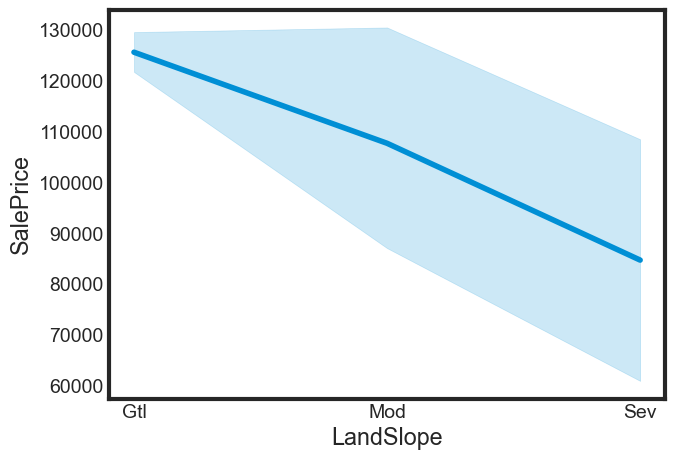

In [233]:
#Looking at land slope in cheap neighborhoods
sns.lineplot(data=cheap_df,x='LandSlope',y='SalePrice')

<Axes: xlabel='LandSlope', ylabel='SalePrice'>

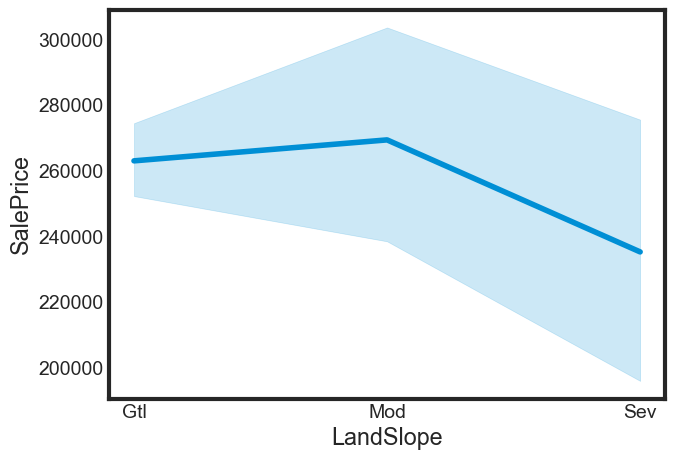

In [234]:
#Looking at land slope in expensive neighborhoods
sns.lineplot(data=exp_df,x='LandSlope',y='SalePrice')

8250.0
5.0
6.0


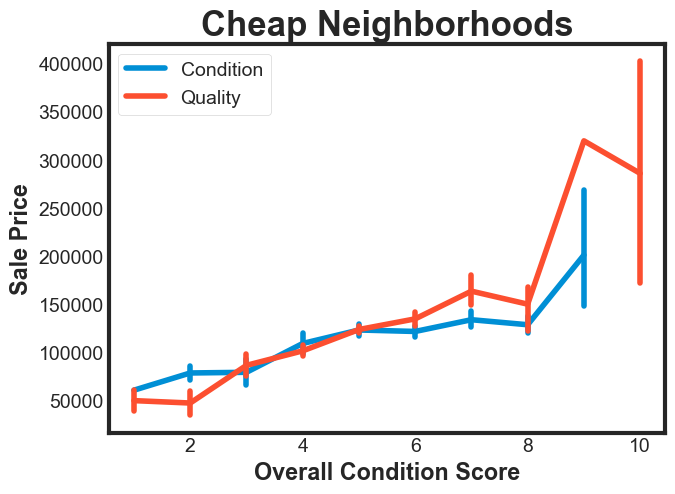

In [235]:
#Plotting condition and quality of sales within cheap neighborhoods
sns.lineplot(data=cheap_df,x='OverallCond',y='SalePrice',err_style='bars')
sns.lineplot(data=cheap_df,x='OverallQual',y='SalePrice',err_style='bars')

#titles
plt.title('Cheap Neighborhoods', weight = 'bold').set_fontsize('25')
plt.xlabel('Overall Condition Score', weight = 'bold')
plt.ylabel('Sale Price', weight = 'bold')
plt.legend(['Condition','Quality'],loc = 'upper left')

#values that may be interesting
cheap_df['LotShape'].value_counts()
cheap_df['MSSubClass'].value_counts()
cheap_df['BldgType'].value_counts()
print(cheap_df['LotArea'].median())

#interesting in comparison to the expensive neighborhoods
#values for the median quality and condition
cheap_df['OverallQual'].value_counts()
print(cheap_df['OverallQual'].median())
cheap_df['OverallCond'].value_counts()
print(cheap_df['OverallCond'].median())

11000.0
7.0
5.0
      Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
378  379          20       RL         88.0    11394   Pave   NaN      Reg   

    LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold YrSold  \
378         Lvl    AllPub  ...    NaN   NaN         NaN       0      6   2010   

    SaleType  SaleCondition  SalePrice  Neighborhood_info  
378      New        Partial     394432        Stone Brook  

[1 rows x 82 columns]


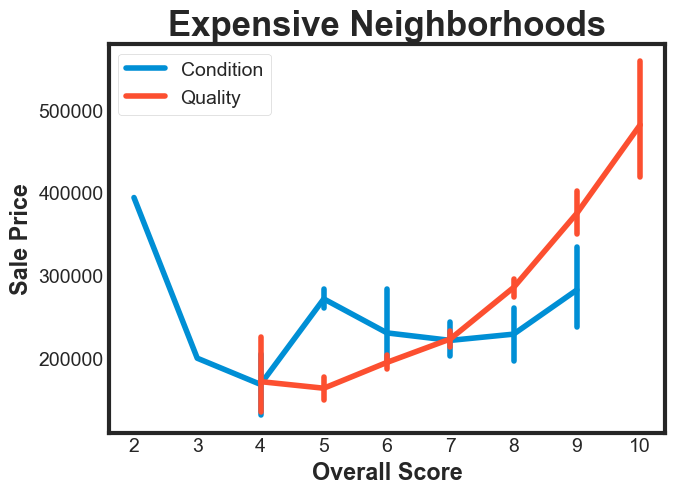

In [236]:
#Plotting quality and condition within expensive neighborhoods
sns.lineplot(data=exp_df,x='OverallCond',y='SalePrice',legend='auto',err_style='bars')
sns.lineplot(data=exp_df,x='OverallQual',y='SalePrice',legend='auto',err_style='bars')

#titles and legend
plt.title('Expensive Neighborhoods', weight = 'bold').set_fontsize('25')
plt.xlabel('Overall Score', weight = 'bold')
plt.ylabel('Sale Price', weight = 'bold')
plt.legend(['Condition','Quality'],loc = 'upper left')

#checking out possible changes within the neighborhood
exp_df['LotShape'].value_counts()
exp_df['MSSubClass'].value_counts()
exp_df['BldgType'].value_counts()
print(exp_df['LotArea'].median())

#interesting
#values for median quality and condition of the sales within expensive nerighborhoods
exp_df['OverallQual'].value_counts()
print(exp_df['OverallQual'].median())
exp_df['OverallCond'].value_counts()
print(exp_df['OverallCond'].median())
print(exp_df[exp_df['OverallCond']==2])

Text(0, 0.5, 'Sale Price')

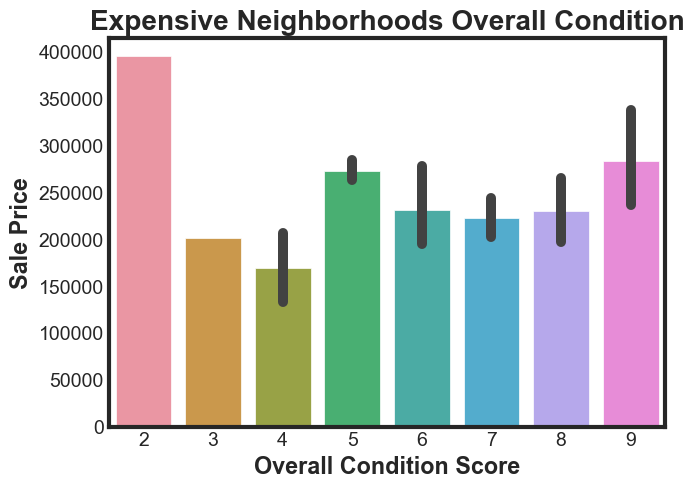

In [237]:
## NOT USING FOR PRES BUT KEEP IN HERE ##
#Plotting overall condition for expensive neighborhoods
sns.barplot(data=exp_df,x='OverallCond',y='SalePrice')
plt.title('Expensive Neighborhoods Overall Condition', weight = 'bold')
plt.xlabel('Overall Condition Score', weight = 'bold')
plt.ylabel('Sale Price', weight = 'bold')

<Axes: xlabel='OverallCond', ylabel='SalePrice'>

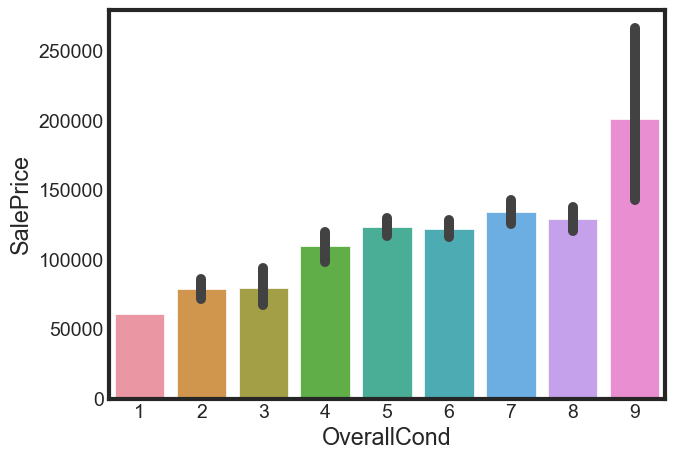

In [238]:
## NOT USING FOR PRES BUT KEEP IN HERE ##
#briefly plotting the overall condition within cheap neighborhoods
sns.barplot(data=cheap_df,x='OverallCond',y='SalePrice')

# Visualizations by Categories

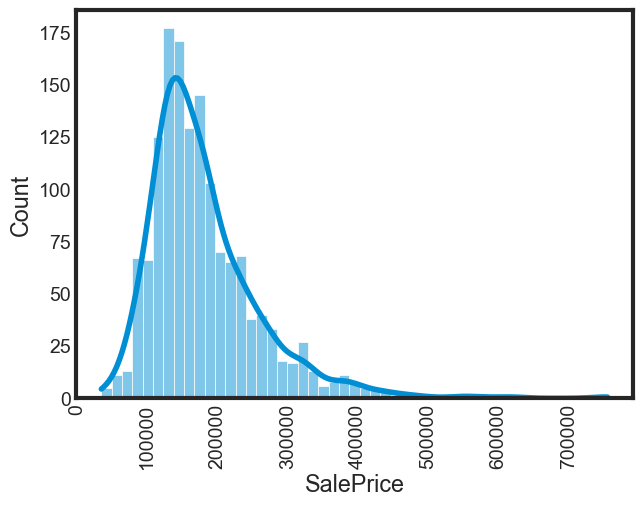

In [239]:
# Distribution of Houses

sns.histplot(df['SalePrice'], kde=True)
# Add tick marks to the x-axis
plt.xticks(rotation=90)  # You can adjust the rotation as needed

# Show the plot
plt.show()

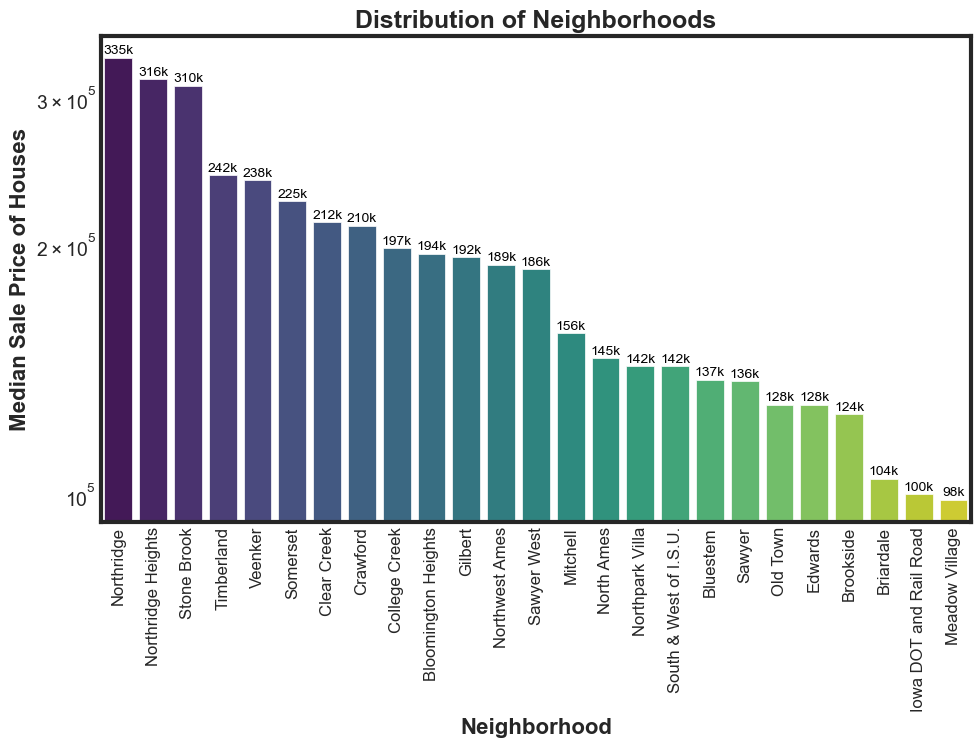

In [240]:
# group data in Neighborhood column and sum
neighborhood_mean = result_df.groupby('Neighborhood_info')['SalePrice'].mean()

# Sort the values in descending order
neighborhood_mean = neighborhood_mean.sort_values(ascending=False)


# Function to format values as '100k'
def format_value(x, pos):
    return f'{int(x/1000)}k'



# create bar plot
plt.figure(figsize= (10, 6))
ax = sns.barplot(x = neighborhood_mean.index, y = neighborhood_mean.values, palette ="viridis")
ax.set_yscale("log")
plt.title('Distribution of Neighborhoods', fontsize = 18, fontweight = 'bold')
plt.xlabel('Neighborhood', fontsize = 16, fontweight = 'bold')
plt.ylabel('Median Sale Price of Houses', fontsize = 16, fontweight = 'bold')

# rotate x axis labels
plt.xticks(rotation = 90, fontsize = 12)

# display actual numbers on the bars
for p in ax.patches:
    ax.annotate(format_value(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# display result
plt.show()

# Statistics

In [420]:
# Create new dataframe with dummy variables for neighborhoods and only numerical fields

df_stats = df.copy()

In [421]:
# # Create dummy variables for the column 'Neighborhood'

# Create dummy variables
dummy_variables = pd.get_dummies(df_stats['Neighborhood_info'], prefix='dummy')

# Concatenate the dummy variables with the original DataFrame
df_stats = pd.concat([df_stats, dummy_variables], axis=1)

# Drop the original column if needed
df_stats = df_stats.drop('Neighborhood_info', axis=1)

# Display the resulting DataFrame
df_stats.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,dummy_Northridge Heights,dummy_Northwest Ames,dummy_Old Town,dummy_Sawyer,dummy_Sawyer West,dummy_Somerset,dummy_South & West of I.S.U.,dummy_Stone Brook,dummy_Timberland,dummy_Veenker
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,False,False,False,False,False,False,False,False,False,False
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,False,False,False,False,False,False,False,False,False,True
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,False,False,False,False,False,False,False,False,False,False
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,False,False,False,False,False,False,False,False,False,False
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,False,False,False,False,False,False,False,False,False,False


In [422]:
# Create a new DataFrame with non-categorical columns
df_no_categorical = df_stats.copy()


In [423]:
df_no_categorical.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,dummy_Northridge Heights,dummy_Northwest Ames,dummy_Old Town,dummy_Sawyer,dummy_Sawyer West,dummy_Somerset,dummy_South & West of I.S.U.,dummy_Stone Brook,dummy_Timberland,dummy_Veenker
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,False,False,False,False,False,False,False,False,False,False
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,False,False,False,False,False,False,False,False,False,True
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,False,False,False,False,False,False,False,False,False,False
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,False,False,False,False,False,False,False,False,False,False
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,False,False,False,False,False,False,False,False,False,False


In [424]:
# Loop through columns and remove categorical variables
for column in df_stats.select_dtypes(include='object').columns:
    df_no_categorical = df_no_categorical.drop(column, axis=1)
    
df_no_categorical.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,dummy_Northridge Heights,dummy_Northwest Ames,dummy_Old Town,dummy_Sawyer,dummy_Sawyer West,dummy_Somerset,dummy_South & West of I.S.U.,dummy_Stone Brook,dummy_Timberland,dummy_Veenker
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,False,False,False,False,False,False,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,False,False,False,False,False,False,True
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,False,False,False,False,False,False,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,False,False,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,False,False,False,False,False,False,False


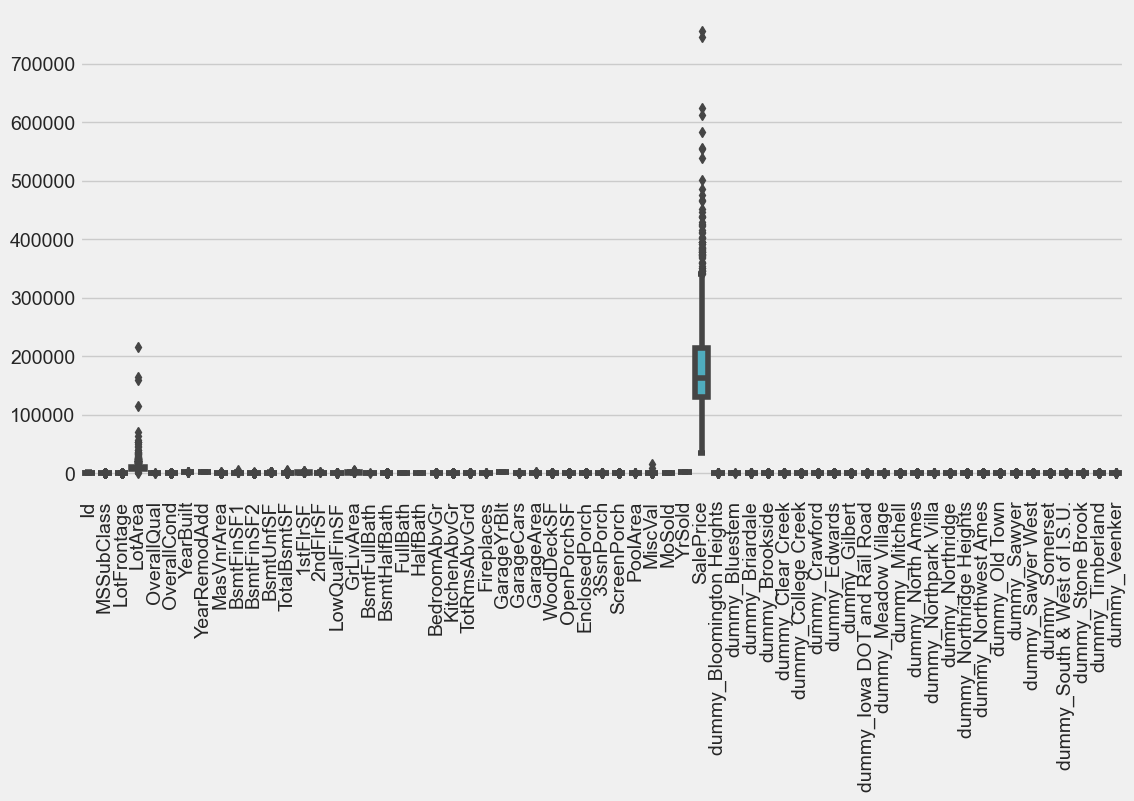

In [425]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_categorical)
plt.xticks(rotation=90)
plt.show()

In [426]:
# Convert Boolean to 1/0

df_no_categorical = df_no_categorical.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

In [427]:
z_scores = stats.zscore(df_no_categorical)
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).all(axis=1)

# Identify rows with outliers
outlier_rows = df_no_categorical[outliers]
outlier_rows.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,dummy_Northridge Heights,dummy_Northwest Ames,dummy_Old Town,dummy_Sawyer,dummy_Sawyer West,dummy_Somerset,dummy_South & West of I.S.U.,dummy_Stone Brook,dummy_Timberland,dummy_Veenker


In [428]:
df_no_categorical.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,dummy_Northridge Heights,dummy_Northwest Ames,dummy_Old Town,dummy_Sawyer,dummy_Sawyer West,dummy_Somerset,dummy_South & West of I.S.U.,dummy_Stone Brook,dummy_Timberland,dummy_Veenker
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,0,0,0,0,0,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,0,0,0,0,0,1
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,0,0,0,0,0,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,0,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,0,0,0,0,0,0


In [429]:
# Drop features that have numbers that are actually categories
print(vif_data)
droplist = ['Id','MSSubClass','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','GarageYrBlt','GarageCars','GarageArea','LotFrontage','TotRmsAbvGrd','YearBuilt']
df_no_categorical = df_no_categorical.drop(droplist,axis=1)
df_no_categorical.head()

                        Variable       VIF
0                          const  1.000000
1                        LotArea  1.405277
2                    OverallQual  3.427646
3                    OverallCond  1.647945
4                      YearBuilt  6.233748
5                   YearRemodAdd  2.346740
6                       1stFlrSF       inf
7                       2ndFlrSF       inf
8                   LowQualFinSF       inf
9                      GrLivArea       inf
10                  BedroomAbvGr  2.461600
11                  KitchenAbvGr  1.404026
12                  TotRmsAbvGrd  5.170608
13                    Fireplaces  1.681873
14                    WoodDeckSF  1.266086
15                   OpenPorchSF  1.267323
16                 EnclosedPorch  1.308302
17                     3SsnPorch  1.036867
18                   ScreenPorch  1.136187
19                      PoolArea  1.125660
20                       MiscVal  1.031749
21                        MoSold  1.056626
22         

,LotArea,OverallQual,OverallCond,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,...,dummy_Northridge Heights,dummy_Northwest Ames,dummy_Old Town,dummy_Sawyer,dummy_Sawyer West,dummy_Somerset,dummy_South & West of I.S.U.,dummy_Stone Brook,dummy_Timberland,dummy_Veenker
0,8450,7,5,2003,856,854,0,1710,3,1,...,0,0,0,0,0,0,0,0,0,0
1,9600,6,8,1976,1262,0,0,1262,3,1,...,0,0,0,0,0,0,0,0,0,1
2,11250,7,5,2002,920,866,0,1786,3,1,...,0,0,0,0,0,0,0,0,0,0
3,9550,7,5,1970,961,756,0,1717,3,1,...,0,0,0,0,0,0,0,0,0,0
4,14260,8,5,2000,1145,1053,0,2198,4,1,...,0,0,0,0,0,0,0,0,0,0


In [430]:
# Find columns with missing values and their counts
missing_counts = df_no_categorical.isnull().sum()

# Filter and print columns with missing values
columns_with_missing_values = missing_counts[missing_counts > 0]
print(columns_with_missing_values)

Series([], dtype: int64)


In [431]:
# Loop through columns and fill NaN values with the median value for each column

for column_name, column in df_no_categorical.items():
    if column.isna().any():  # Check if the column has any NaN values
        median = column.median()
        df_no_categorical[column_name].fillna(median, inplace=True)

In [432]:
X = df_no_categorical.drop('SalePrice', axis = 1) #keep features only for X
y = df_no_categorical['SalePrice'] #keep target variable only for y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [433]:
sc = StandardScaler()
# fit the data i.e. calculate the mean and sd of each column of X_train
sc.fit(X_train)

#transform the train data
X_train_sc = sc.transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)

#transform the test data
X_test_sc = sc.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

In [434]:
X_reg = sm.add_constant(X_train_sc) # adding a constant
reg1 = sm.OLS(np.asarray(y_train), X_reg).fit() 
pred = reg1.predict(X_reg) 

reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     113.4
Date:                Wed, 15 Nov 2023   Prob (F-statistic):               0.00
Time:                        23:09:31   Log-Likelihood:                -13824.
No. Observations:                1168   AIC:                         2.774e+04
Df Residuals:                    1124   BIC:                         2.796e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         1.814e+05    996.920    182.002      0.000    1.79e+05    1.83e+05
LotArea                       4832.7018   1175.924      4.110      0.000    2525.448    7139.956
OverallQual                    2.11e+04   1794.779     11.755      0.000    1.76e+04    2.46e+04
OverallCond                   3719.4141   1209.736      3.075      0.002    1345.820    6093.008
YearRemodAdd                  5447.7288   1449.841      3.757      0.000    2603.029    8292.429
1stFlrSF                      1.478e+04   1081.786     13.660      0.000    1.27e+04    1.69e+04
2ndFlrSF                      6454.6984    952.836      6.774      0.000    4585.161    8324.236
LowQualFinSF                   -98.4988   1070.322     -0.092      0.927   -2198.553    2001.556
GrLivArea                      1.63e+04   1036.084     15.729      0.000    1.43e+04    1.83e+04
BedroomAbvGr                 -2057.2479   1350.751     -1.523      0.128   -4707.524     593.028
KitchenAbvGr                 -3741.4438   1135.299     -3.296      0.001   -5968.988   -1513.900
Fireplaces                    3183.6525   1291.850      2.464      0.014     648.943    5718.362
WoodDeckSF                    3914.5939   1121.063      3.492      0.000    1714.983    6114.205
OpenPorchSF                    771.0180   1121.528      0.687      0.492   -1429.506    2971.542
EnclosedPorch                 -870.9371   1112.015     -0.783      0.434   -3052.796    1310.921
3SsnPorch                     2024.1764   1014.726      1.995      0.046      33.205    4015.147
ScreenPorch                   3555.8173   1062.017      3.348      0.001    1472.058    5639.577
PoolArea                      -171.3053   1050.374     -0.163      0.870   -2232.219    1889.609
MiscVal                        -61.9831   1011.140     -0.061      0.951   -2045.917    1921.951
MoSold                       -1311.2597   1023.637     -1.281      0.200   -3319.715     697.196
YrSold                        -147.9624   1028.504     -0.144      0.886   -2165.967    1870.042
dummy_Bloomington Heights    -1675.7749   1035.147     -1.619      0.106   -3706.813     355.263
dummy_Bluestem                -861.9876    999.969     -0.862      0.389   -2824.004    1100.029
dummy_Briardale              -3145.7932   1013.103     -3.105      0.002   -5133.579   -1158.008
dummy_Brookside              -2498.8785   1027.485     -2.432      0.015   -4514.882    -482.875
dummy_Clear Creek              996.1332   1042.411      0.956      0.339   -1049.157    3041.423
dummy_College Creek           2663.3879    997.524      2.670      0.008     706.169    4620.607
dummy_Crawford                1239.2779   1031.408      1.202      0.230    -784.424    3262.980
dummy_Edwards                -5653.1371    985.823     -5.734      0.000   -

In [435]:
# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X_reg.columns
vif_data["VIF"] = [variance_inflation_factor(X_reg.values, i) for i in range(X_reg.shape[1])]

# Display the VIF DataFrame
print(vif_data)

                        Variable       VIF
0                          const  1.000000
1                        LotArea  1.391357
2                    OverallQual  3.241168
3                    OverallCond  1.472518
4                   YearRemodAdd  2.115050
5                       1stFlrSF       inf
6                       2ndFlrSF       inf
7                   LowQualFinSF       inf
8                      GrLivArea       inf
9                   BedroomAbvGr  1.835820
10                  KitchenAbvGr  1.296882
11                    Fireplaces  1.679206
12                    WoodDeckSF  1.264560
13                   OpenPorchSF  1.265610
14                 EnclosedPorch  1.244231
15                     3SsnPorch  1.036043
16                   ScreenPorch  1.134862
17                      PoolArea  1.110114
18                       MiscVal  1.028731
19                        MoSold  1.054319
20                        YrSold  1.064368
21     dummy_Bloomington Heights       inf
22         

In [436]:
# Step 2 and 3: Iteratively remove features with p-values above 0.05
insig_features = [] # Store names of insignificant features
while True:
    # Get the feature with the highest p-value
    max_pvalue = reg1.pvalues[1:].max()
    if max_pvalue > 0.05:
        feature_to_remove = reg1.pvalues[1:].idxmax()
        insig_features.append(feature_to_remove)
        print(f"Removing feature: {feature_to_remove} (p-value={max_pvalue:.4f})")
        
        # Create a new OLS model without the feature to be removed
        X_reg = X_reg.drop(feature_to_remove, axis=1)
        X_reg = sm.add_constant(X_reg)
        reg1 = sm.OLS(np.asarray(y_train), X_reg).fit()
    else:
        break

Removing feature: MiscVal (p-value=0.9511)
Removing feature: LowQualFinSF (p-value=0.9273)
Removing feature: YrSold (p-value=0.8860)
Removing feature: PoolArea (p-value=0.8778)
Removing feature: dummy_Gilbert (p-value=0.8149)
Removing feature: dummy_Sawyer West (p-value=0.5256)
Removing feature: dummy_Mitchell (p-value=0.5299)
Removing feature: OpenPorchSF (p-value=0.5161)
Removing feature: 2ndFlrSF (p-value=0.4317)
Removing feature: dummy_Bluestem (p-value=0.4083)
Removing feature: dummy_Northpark Villa (p-value=0.4082)
Removing feature: EnclosedPorch (p-value=0.3779)
Removing feature: MoSold (p-value=0.2448)
Removing feature: dummy_Sawyer (p-value=0.2501)
Removing feature: dummy_Bloomington Heights (p-value=0.2384)
Removing feature: dummy_Brookside (p-value=0.2109)
Removing feature: dummy_North Ames (p-value=0.3853)
Removing feature: dummy_Northwest Ames (p-value=0.2371)
Removing feature: dummy_Meadow Village (p-value=0.1842)
Removing feature: BedroomAbvGr (p-value=0.1526)


In [437]:
# Create a list of statistically significant variables to use for the final model
results = reg1.params.reset_index()
results = pd.DataFrame(results)
stat_sig_Pred = results['index'].values
display(stat_sig_Pred)
stat_sig_Pred = np.delete(stat_sig_Pred, 0)
stat_sig_Pred

array(['const', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd',
       '1stFlrSF', 'GrLivArea', 'KitchenAbvGr', 'Fireplaces',
       'WoodDeckSF', '3SsnPorch', 'ScreenPorch', 'dummy_Briardale',
       'dummy_Clear Creek', 'dummy_College Creek', 'dummy_Crawford',
       'dummy_Edwards', 'dummy_Iowa DOT and Rail Road',
       'dummy_Northridge', 'dummy_Northridge Heights', 'dummy_Old Town',
       'dummy_Somerset', 'dummy_South & West of I.S.U.',
       'dummy_Stone Brook', 'dummy_Timberland', 'dummy_Veenker'],
      dtype=object)

array(['LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd',
       '1stFlrSF', 'GrLivArea', 'KitchenAbvGr', 'Fireplaces',
       'WoodDeckSF', '3SsnPorch', 'ScreenPorch', 'dummy_Briardale',
       'dummy_Clear Creek', 'dummy_College Creek', 'dummy_Crawford',
       'dummy_Edwards', 'dummy_Iowa DOT and Rail Road',
       'dummy_Northridge', 'dummy_Northridge Heights', 'dummy_Old Town',
       'dummy_Somerset', 'dummy_South & West of I.S.U.',
       'dummy_Stone Brook', 'dummy_Timberland', 'dummy_Veenker'],
      dtype=object)

In [438]:
X_train_new = X_train_sc[stat_sig_Pred]
X_train_new = sm.add_constant(X_train_new)

reg = sm.OLS(np.asarray(y_train), X_train_new).fit()

In [439]:
coef_vec = pd.DataFrame(reg.params.round(2))

coef_vec = coef_vec.reset_index()

coef = coef_vec.rename(columns = {'index':'Variable_Names', 0:'MultiReg_coeff'})

coef

,Variable_Names,MultiReg_coeff
0,const,181441.54
1,LotArea,5254.66
2,OverallQual,22027.89
3,OverallCond,2773.14
4,YearRemodAdd,6984.32
5,1stFlrSF,8702.28
6,GrLivArea,22409.01
7,KitchenAbvGr,-3829.62
8,Fireplaces,3441.73
9,WoodDeckSF,3946.10


In [440]:
print('Forecasted SalePrice =')
for x in range (0, len(coef['Variable_Names'])):
    print( coef['Variable_Names'][x], " * ", coef['MultiReg_coeff'][x], end="")
    if x < len(coef['Variable_Names']) - 1:
        print(" + ")

Forecasted SalePrice =
const  *  181441.54 + 
LotArea  *  5254.66 + 
OverallQual  *  22027.89 + 
OverallCond  *  2773.14 + 
YearRemodAdd  *  6984.32 + 
1stFlrSF  *  8702.28 + 
GrLivArea  *  22409.01 + 
KitchenAbvGr  *  -3829.62 + 
Fireplaces  *  3441.73 + 
WoodDeckSF  *  3946.1 + 
3SsnPorch  *  2209.24 + 
ScreenPorch  *  3519.99 + 
dummy_Briardale  *  -2171.97 + 
dummy_Clear Creek  *  2100.87 + 
dummy_College Creek  *  4916.73 + 
dummy_Crawford  *  2971.71 + 
dummy_Edwards  *  -3140.43 + 
dummy_Iowa DOT and Rail Road  *  -2070.54 + 
dummy_Northridge  *  10621.76 + 
dummy_Northridge Heights  *  15221.74 + 
dummy_Old Town  *  -4919.85 + 
dummy_Somerset  *  6841.82 + 
dummy_South & West of I.S.U.  *  -2525.03 + 
dummy_Stone Brook  *  8897.79 + 
dummy_Timberland  *  3245.52 + 
dummy_Veenker  *  3440.94

In [441]:
X_test_new = X_test_sc[stat_sig_Pred] 
print(X_test_new.shape)
X_test_new = sm.add_constant(X_test_sc[stat_sig_Pred])
print(X_test_new.shape)

(292, 25)
(292, 26)


In [442]:
# Predict on the test data, first add constant to match the dimension
X_test_new = X_test_sc[stat_sig_Pred] 
X_test_new = X_test_new.assign(Constant=1)

# Reorder columns to have the constant as the first column
X_test_new = X_test_new[['Constant'] + [col for col in X_test_new.columns if col != 'Constant']]

# Calculate the estimated y values using the test dataset
y_hat_test = reg.predict(X_test_new)

linear_predictions = y_hat_test

In [443]:
test_mse = mean_squared_error(y_test, y_hat_test)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_hat_test)
test_r_squared = r2_score(y_test, y_hat_test)
test_mape = mean_absolute_percentage_error(y_test, y_hat_test)

r_squared_linear_reg = test_r_squared

print(f'The test RMSE is:\t{round(test_rmse, 3)}')
print(f'The test Rsquared is:\t{round(test_r_squared, 4)}')
print(f'The test MAPE is:\t{round(test_mape, 4)}')

The test RMSE is:	35575.875
The test Rsquared is:	0.835
The test MAPE is:	0.1241


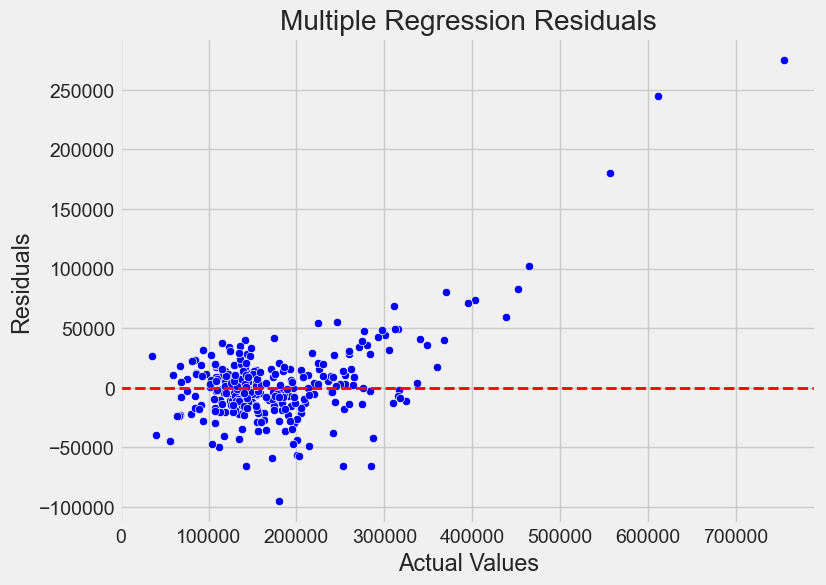

In [444]:
# Calculate the residuals
model = LinearRegression()
model.fit(X_train, y_train)

residuals = y_test - model.predict(X_test)

# Plot the residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)  # Add a horizontal line at y=0
plt.title('Multiple Regression Residuals')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()